# Pre-processing and analysis of single-cell RNA-seq with kallisto|bustools 

This notebook is based on methods described in the following publications:
* Bray, N. L., Pimentel, H., Melsted, P. & Pachter, L. Near-optimal probabilistic RNA-seq quantification. Nat. Biotechnol. 34, 525–527 (2016).
* Wolf, F. A., Angerer, P. & Theis, F. J. SCANPY: large-scale single-cell gene expression data analysis. Genome Biol. 19, 15 (2018).
* Melsted, P., Ntranos, V. & Pachter, L. The Barcode, UMI, Set format and BUStools. Bioinformatics (2019). doi:10.1093/bioinformatics/btz279
* Melsted, P., Booeshaghi, A.S. et al. Modular and efficient pre-processing of single-cell RNA-seq. BioRxiv (2019). doi:10.1101/673285


In [1]:
!date

Mon Nov  4 04:37:14 UTC 2019


## Install `kb` (includes kallisto and bustools)

Install `kb` for running the kallisto|bustools workflow

In [2]:
!time pip install kb-python==0.24.1


     |████████████████████████████████| 35.4MB 228kB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for loompy: filename=loompy-3.0.6-cp36-none-any.whl size=47896 sha256=81093c8db64af7b3c82154e6d9f02fe2e9a8004e78c9c10a788dad4c1b638518
  Stored in directory: /root/.cache/pip/wheels/f9/a4/90/5a98ad83419732b0fba533b81a2a52ba3dbe230a936ca4cdc9
  Created wheel for numpy-groupies: filename=numpy_groupies-0+unknown-cp36-none-any.whl size=27879 sha256=9ae3607d2d786049ce03248a4f9be5e86c185a3c0e54a3d37a47902b7fe1b838
  Stored in directory: /root/.cache/pip/wheels/6c/fb/3d/5c43eb691bd92a3ddd0ebeb6e7e78ceaf3ae1cb8d54b89a7fb
Successfully built loompy numpy-groupies

real	0m10.986s
user	0m6.532s
sys	0m1.097s


### Run kb

In [3]:
!time kb ref -d mouse -i idx.idx -g t2g.txt

[2019-11-04 04:37:27,840]    INFO Downloading files for mouse from https://caltech.box.com/shared/static/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz to tmp/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz
[2019-11-04 04:38:53,429]    INFO Extracting files from tmp/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz

real	1m56.990s
user	0m35.530s
sys	0m11.449s


In [4]:
!time kb count -i idx.idx -g t2g.txt -x 10xv2 --h5ad https://tinyurl.com/read1-fq https://tinyurl.com/read2-fq

[2019-11-04 04:39:25,511]    INFO Piping https://tinyurl.com/read1-fq to tmp/read1-fq
[2019-11-04 04:39:25,513]    INFO Piping https://tinyurl.com/read2-fq to tmp/read2-fq
[2019-11-04 04:39:25,513]    INFO Generating BUS file from
[2019-11-04 04:39:25,513]    INFO         tmp/read1-fq
[2019-11-04 04:39:25,513]    INFO         tmp/read2-fq
[2019-11-04 04:42:21,561]    INFO Sorting BUS file ./output.bus to tmp/output.s.bus
[2019-11-04 04:42:25,348]    INFO Whitelist not provided
[2019-11-04 04:42:25,348]    INFO Copying pre-packaged 10XV2 whitelist to .
[2019-11-04 04:42:25,484]    INFO Inspecting BUS file tmp/output.s.bus
[2019-11-04 04:42:27,357]    INFO Correcting BUS records in tmp/output.s.bus to tmp/output.s.c.bus with whitelist ./10xv2_whitelist.txt
[2019-11-04 04:42:45,445]    INFO Sorting BUS file tmp/output.s.c.bus to ./output.unfiltered.bus
[2019-11-04 04:42:48,884]    INFO Generating count matrix ./counts_unfiltered/cells_x_genes from BUS file ./output.unfiltered.bus
[2019-11

## Perform basic analysis with ScanPy 

*   Based on the Jupyter notebook from [kallistobus.tools/getting_started](https://www.kallistobus.tools/getting_started) 

### Install python packages

In [5]:
!pip install scanpy[louvain] 
!pip install MulticoreTSNE

     |████████████████████████████████| 1.9MB 1.5MB/s 
     |████████████████████████████████| 3.6MB 32.0MB/s 
     |████████████████████████████████| 13.0MB 11.7MB/s 
     |████████████████████████████████| 92kB 11.5MB/s 
     |████████████████████████████████| 378kB 43.1MB/s 
  Created wheel for louvain: filename=louvain-0.6.1-cp36-cp36m-linux_x86_64.whl size=1024067 sha256=13faac2aa369ecccec03d1c80208af2443935729a602e442787fd8e1bdf1374d
  Stored in directory: /root/.cache/pip/wheels/f2/c3/d4/f7abaf064186d6214ef952bbb72fd6c5136d4b17dbeaeff481
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2217709 sha256=f0922f091f4057c41d013adb60a4f231d473fb2300af6fd445564df70a6c3b02
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built louvain python-igraph
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68507 sha256=ec2cd867d4e2093fea8d9d89e0b114502e3d5960b25fe65e4ac45c0f4dbc28a7
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


### Import Packages

In [0]:
import scanpy as sc
from scipy import sparse, io
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

### Import result

In [0]:
folder = "counts_unfiltered/"

The annotated dataframe has rows (obs) which are cell barcodes, columns (var) which are genes. The actual matrix `adata.X` is a sparse matrix.

In [0]:
adata = sc.read(folder + "adata.h5ad")

In [9]:
adata

AnnData object with n_obs × n_vars = 96775 × 55421 

### Make the knee plot

In [0]:
knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

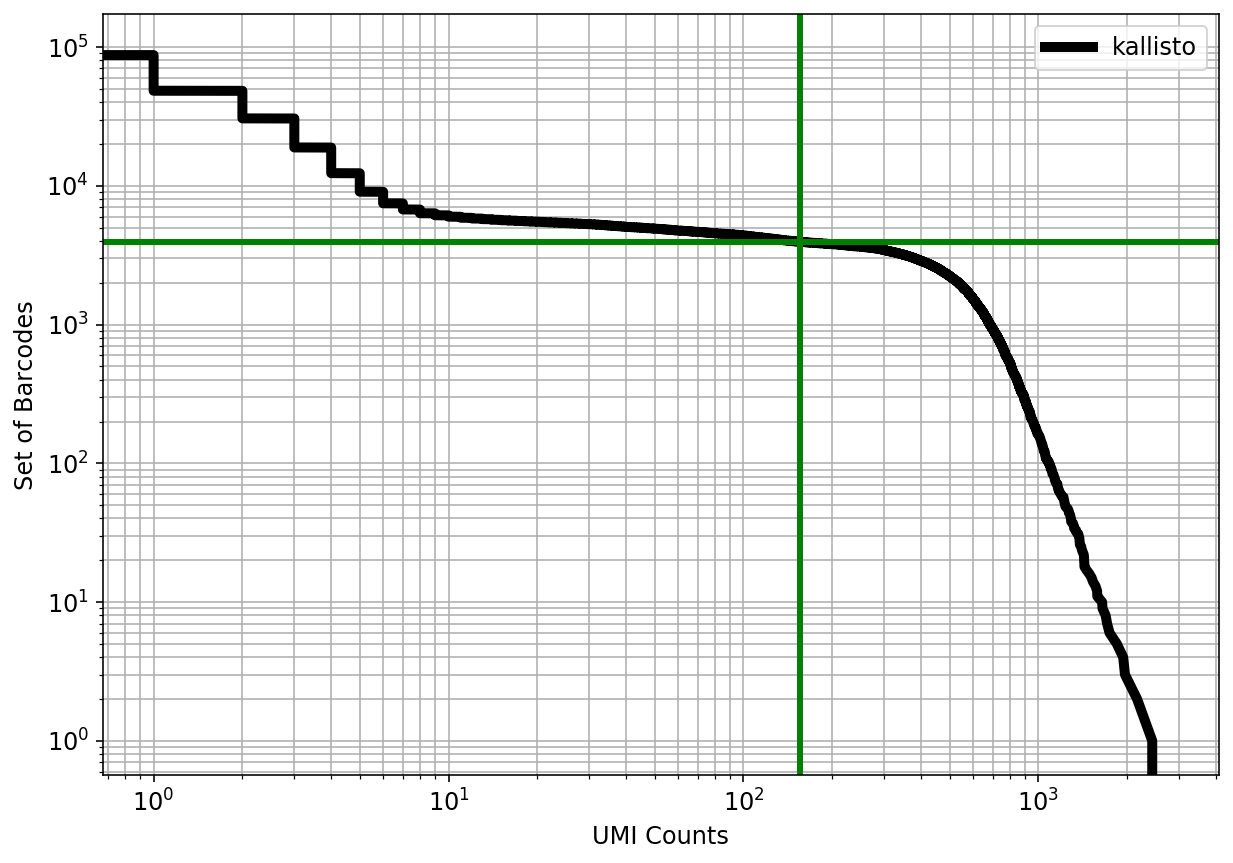

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

expected_num_cells=3949

ax.loglog(knee, range(len(knee)), label="kallisto", linewidth=5, color="k")
ax.axvline(x=knee[expected_num_cells], linewidth=3, color="g")
ax.axhline(y=expected_num_cells, linewidth=3, color="g")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
ax.legend()
plt.show()

### Filter cells

In [0]:
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_cells(adata, min_counts=knee[expected_num_cells])
sc.pp.filter_genes(adata, min_cells=0)

In [13]:
adata

AnnData object with n_obs × n_vars = 3950 × 55421 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

### Distribution of genes

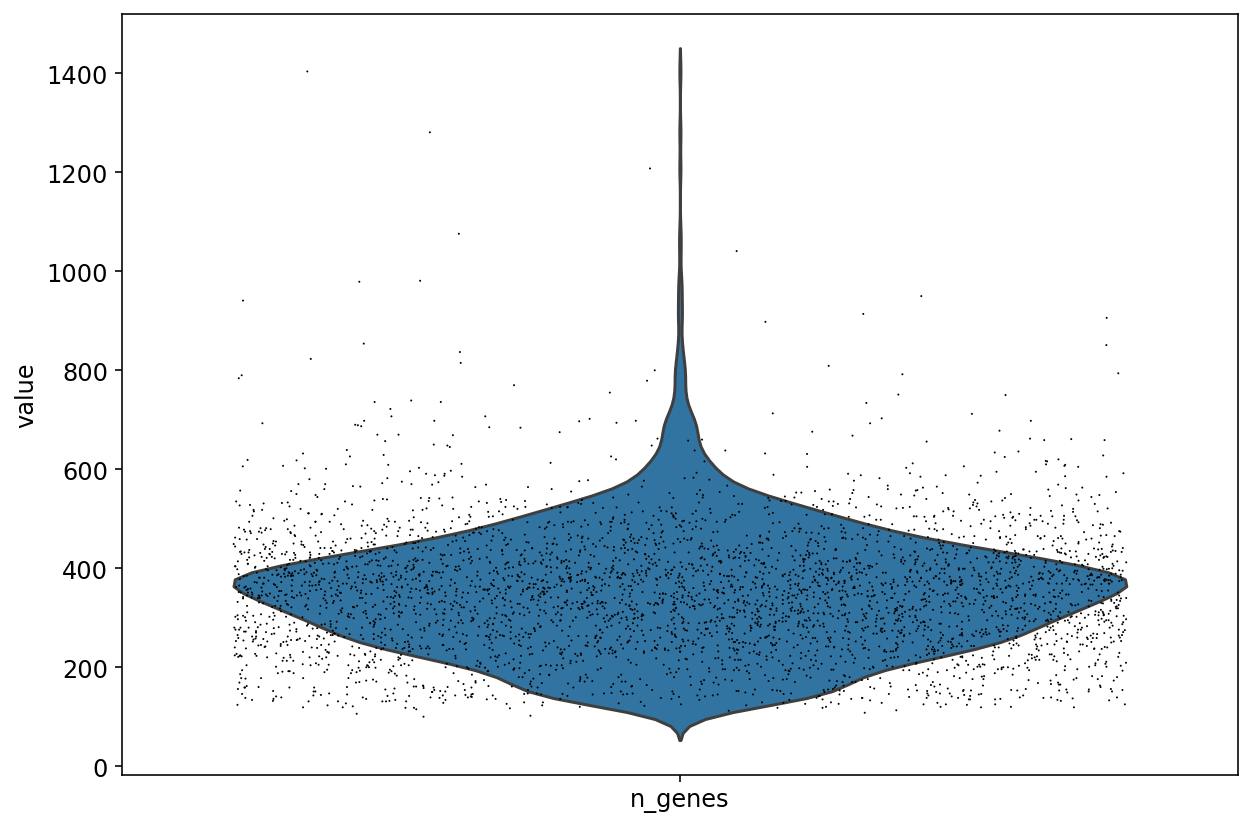

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.violin(adata, 'n_genes', jitter=0.4, ax=ax)

### Distribution of counts

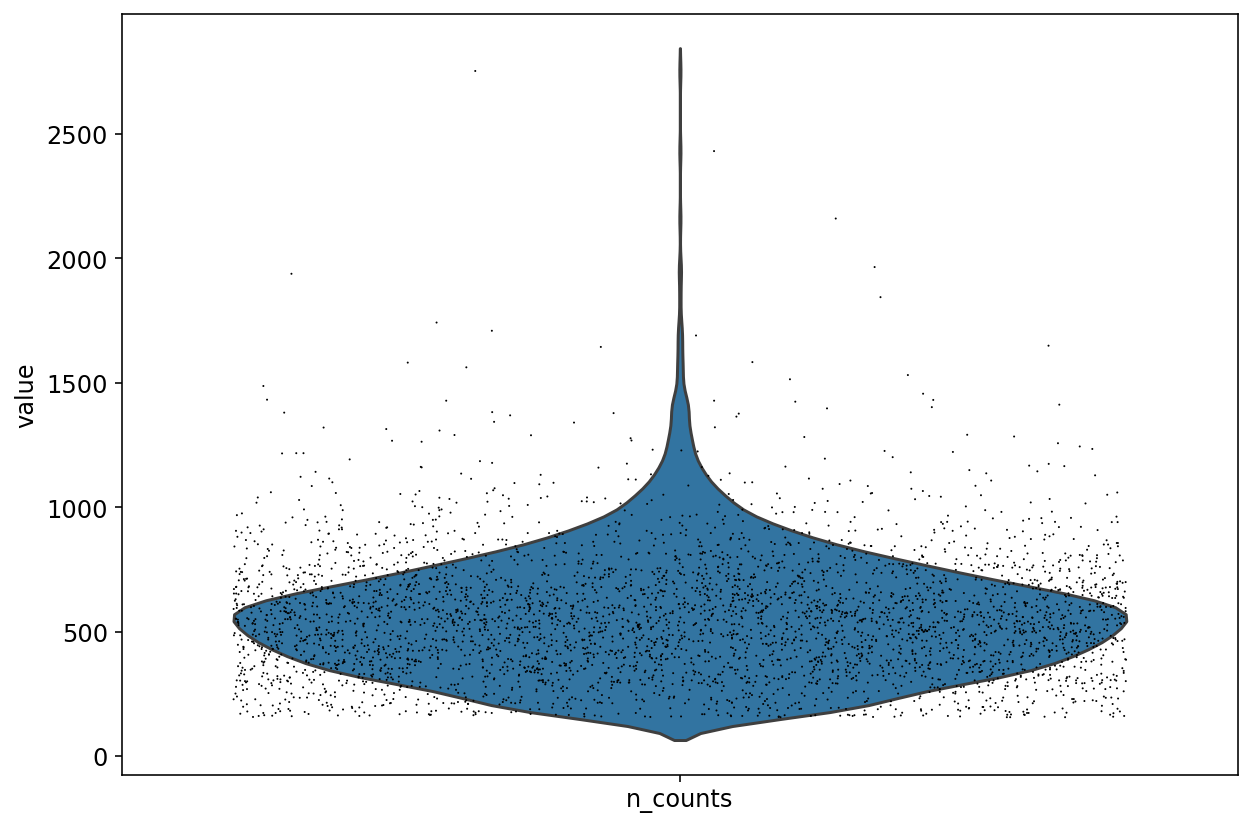

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.violin(adata, 'n_counts', jitter=0.4, ax=ax)

Normalize the counts in the matrix

In [0]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

apply $log(1+count)$ to all counts in your matrix

In [0]:
adata.raw = sc.pp.log1p(adata, copy=True)

In [0]:
sc.pp.log1p(adata)

Filter adata for highly variable genes, and make `fadata` which only contains highly variable genes for further analysis.

### Highly variable genes

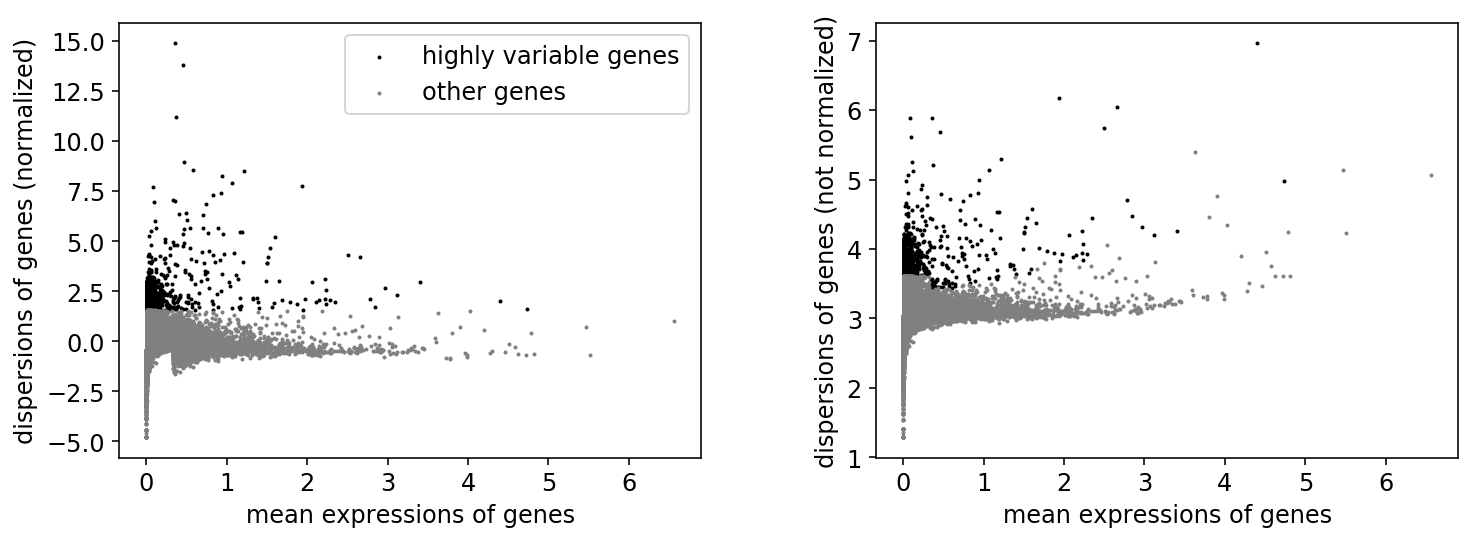

In [19]:
filter_result = sc.pp.highly_variable_genes(adata, min_disp=0.3,inplace=False, n_top_genes=1209)

sc.pl.highly_variable_genes(filter_result)

In [20]:
print("{:,} highly variable genes".format(sum(x[0] for x in filter_result)))

1,209 highly variable genes


### Cluster with Louvain and Plot PCA, UMAP, TSNE

In [21]:
%%time
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)

CPU times: user 31.4 s, sys: 3.23 s, total: 34.6 s
Wall time: 21 s


In [22]:
%%time
sc.tl.tsne(adata, n_pcs=10)

CPU times: user 29.9 s, sys: 5.32 ms, total: 29.9 s
Wall time: 29.9 s


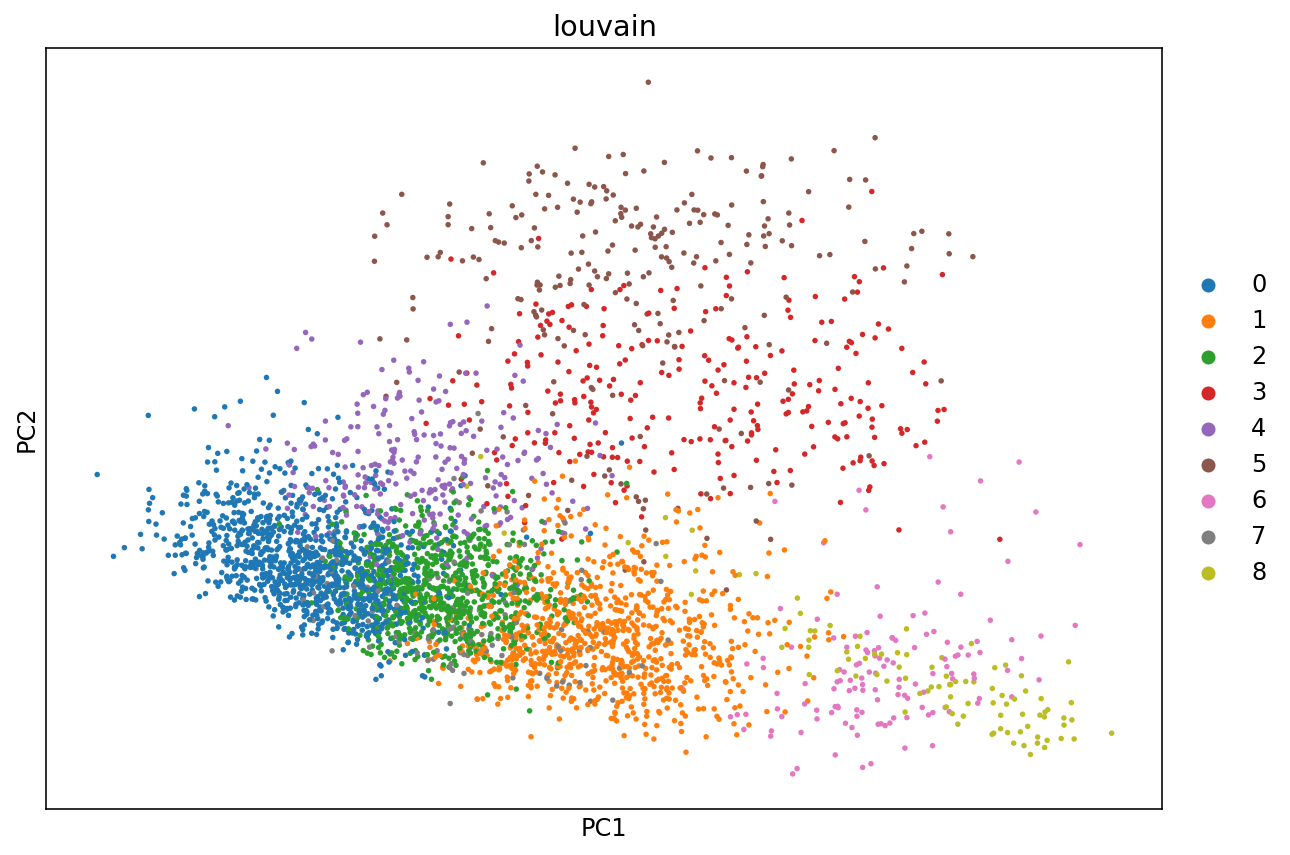

In [23]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.pca(adata, color="louvain", ax=ax)

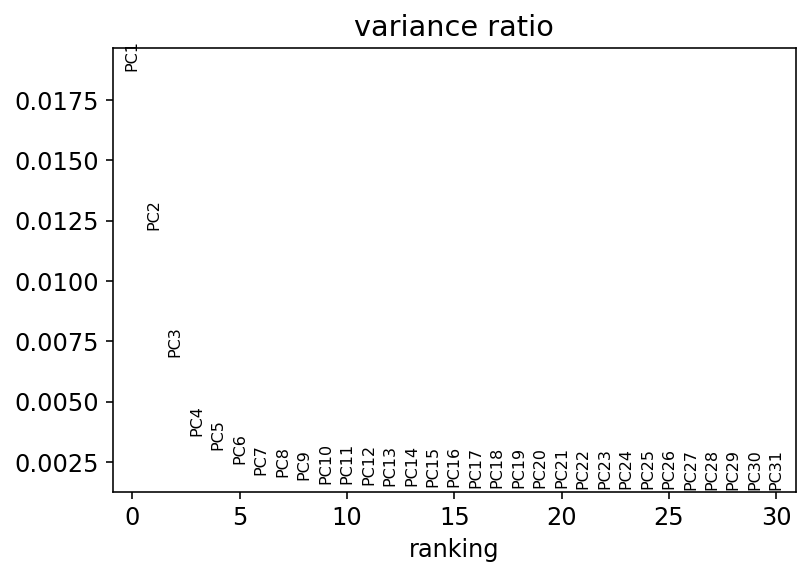

In [24]:
sc.pl.pca_variance_ratio(adata)

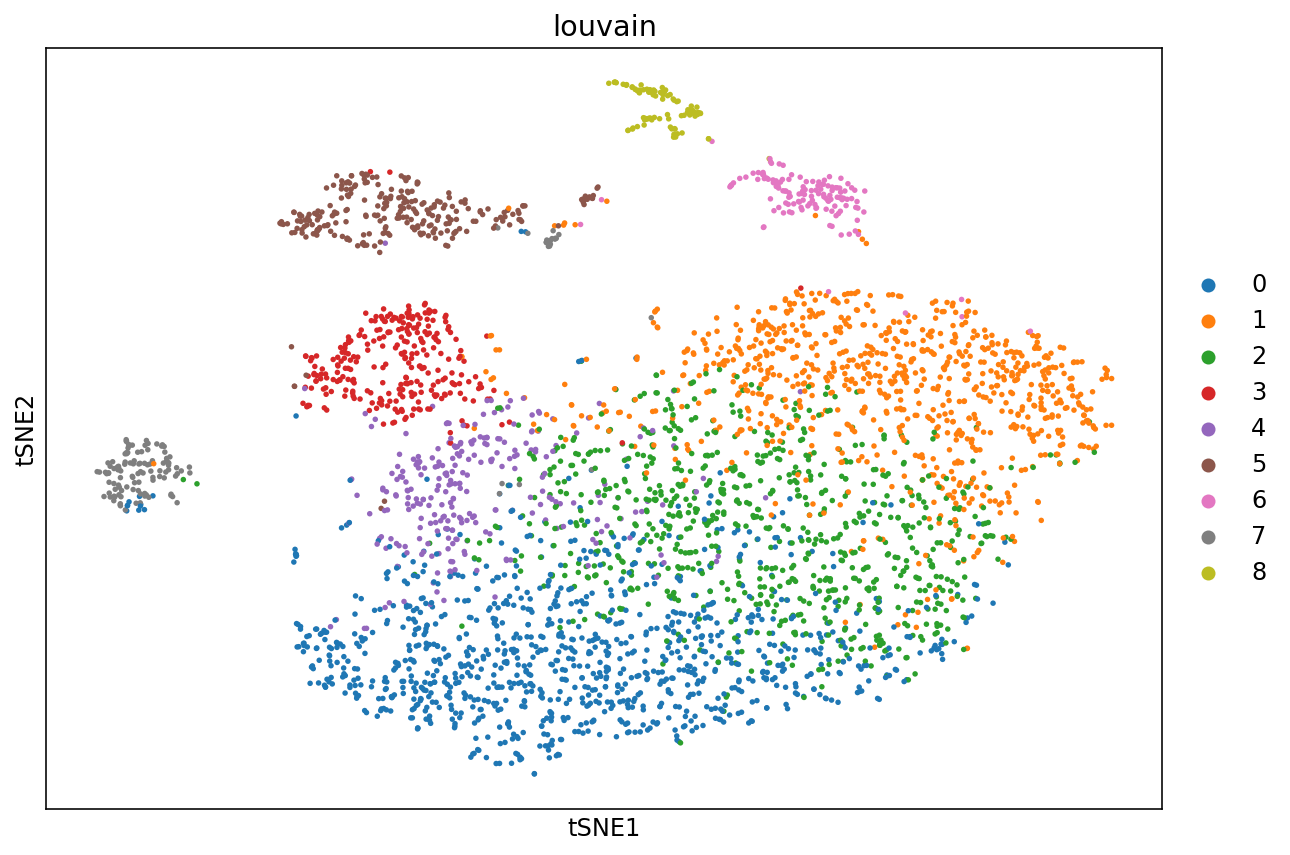

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.tsne(adata, color="louvain", ax=ax, save="getting_started_tsne.png")

In [26]:
!date

Mon Nov  4 04:50:16 UTC 2019
